In [1]:
##################################
'''Importing Required Libraries'''
##################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
############################################
'''Reading data from source file '''
############################################

data=pd.read_csv('/home/kumarg/Downloads/Health Care Index.csv')
data.head()

,Rank,Country,Health care index,Health care Exp. Index,Country Code
0,1,Taiwan,86.71,159.66,TWN
1,2,South Korea,81.97,149.94,NaN
2,3,Japan,81.14,148.24,JPN
3,4,Denmark,80.00,147.47,DNK
4,5,France,79.99,146.81,FRA


In [3]:
############################################
'''Data info'''
############################################
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
Rank                      93 non-null int64
Country                   93 non-null object
Health care index         93 non-null float64
Health care Exp. Index    93 non-null float64
Country Code              75 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ KB


In [4]:
############################################
'''Max Ranking of the Country'''
############################################
data.max()

Rank                           93
Country                   Vietnam
Health care index           86.71
Health care Exp. Index     159.66
dtype: object

In [5]:
############################################
'''Min Ranking of the Country'''
############################################
data.min()

Rank                            1
Country                   Albania
Health care index           39.66
Health care Exp. Index       69.1
dtype: object

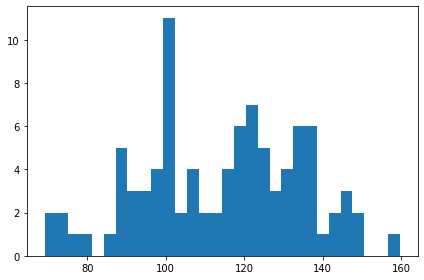

In [6]:
############################################
'''Health care Exp. Index'''
############################################
plt.hist(data['Health care Exp. Index'],bins=30)
plt.tight_layout()

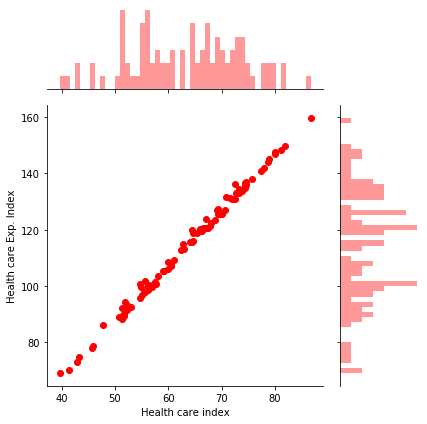

<Figure size 720x432 with 0 Axes>

In [7]:
##################################################
'''Health care index Vs Health care Exp. Index'''
##################################################

sns.jointplot(y='Health care Exp. Index',x='Health care index',data=data,annot_kws=True,kind="scatter",marginal_kws=dict(bins=50, rug=False),color='r', ratio=3)
plt.figure(figsize=(10,6))
plt.tight_layout()

In [8]:
##################################
'''Ranking of My Country India'''
##################################

data[data['Country'].str.contains('India')]

,Rank,Country,Health care index,Health care Exp. Index,Country Code
37,38,India,67.13,120.5,IND


In [10]:
########################################################
'''Health care Exp. Index World Wide Using Plotly'''
########################################################
df = pd.read_csv('/home/kumarg/Downloads/Health Care Index.csv')

fig = go.Figure(data=go.Choropleth(
    locations = df['Country Code'],
    z = df['Health care Exp. Index'],
    text = df['Country'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Health care index',
))

fig.update_layout(
    title_text='Health Care Index by Country 2020',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.numbeo.com/health-care/rankings_by_country.jsp?title=2020&displayColumn=-1">\
            Rankings by Country</a>',
        showarrow = False
    )]
)

fig.show()